#   File: DSC550 Curry Week6 MidTerm.py
#   Name: Adam Curry
#   Date: 04/18/2020
#   Course: DSC540 - Data Mining
#   Desc: This program conducts a topic model on Tweets made by @realDonaldTrump. There is no political motives, I just thought it'd be fun to show the president's Tweets over time
#   Usage: This program should be used when reviewing my midterm

The goal of this project is to analyze Tweets from the president. There are no political motives and there are no assumptions made about the president. With that disclaimer, below are some hypothesis questions I’d like to answer. 

*   Does the president have more tweets before he was president (<201611) or after (>201611)?
*	What topic did the president tweet about the most and is this topic consistent over time? 
*	Are there any correlations between the topic and the time of year?
*	Are there any correlations between the topic and the number of retweets and favorites? 
    + Retweets – somebody retweets the president’s original tweet
    + Favorites – somebody “favorited” (liked) the president’s original tweet
*	Is there a linear trajectory of the frequency of retweets and favorites over time?

#### Step 1: import the data, clean, and apply stemming and lemmatization

In [1]:
import nltk
import pandas as pd

# import the covid comments
path =r'C:\Users\adamp\OneDrive\Desktop\a_data_mining\Week6\tweets.csv'
df = pd.read_csv(path,  engine='python')
#df =  pd.DataFrame(dataframe['text'].copy())
# remove hyper links from data
df['content_cleanLinks'] = df['text'].replace(
        r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
# remove hastags links from data
df['contents_hashtags'] = df['content_cleanLinks'].replace(
        r'http\S+', '', regex=True).replace(r'#.*?(?=\s|$)', '', regex=True)
# remove Tweets @ anybody
df['contents_at'] = df['contents_hashtags'].replace(
        r'http\S+', '', regex=True).replace(r'@.*?(?=\s|$)', '', regex=True)
import string
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')

def remove_punctuations(text):
    """
    remove punct and apply stemming and lower case all text
    """
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '').lower()
        stemmer.stem(text)
    return text

df = pd.DataFrame(df)
df['content_no_punk'] = df['contents_at'].apply(remove_punctuations)

# apply lemmatization
from nltk.corpus import wordnet

# add the models to an object
lemmatizer = nltk.stem.WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    """
    apply part of speech tagging
    """
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    """
    apply part of speech tagging
    """
    global wordnet_tagged
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

# Lemmatizing
df['Lemmatized'] = df['content_no_punk'].apply(lambda x: lemmatize_sentence(x))
df = df[df['Lemmatized'].apply(lambda x: len(x) > 10)]
print(df.head())

               source                                               text  \
0  Twitter for iPhone  An incompetent political hack! Come back to Wa...   
1  Twitter for iPhone  This is a disgraceful situation! https://t.co/...   
2  Twitter for iPhone  Lamestream Media is only getting worse! https:...   
3  Twitter for iPhone           Cut him off now! https://t.co/kdGybEFeOI   
4  Twitter for iPhone  Great book. Get it and support Charlie! https:...   

       created_at  retweet_count  favorite_count is_retweet        id_str  \
0  4/18/2020 3:50          25848           80837      False  1.250000e+18   
1  4/18/2020 3:47          20027           64121      False  1.250000e+18   
2  4/18/2020 3:42           9718           33916      False  1.250000e+18   
3  4/18/2020 3:40          28072           86435      False  1.250000e+18   
4  4/18/2020 3:38           7597           31886      False  1.250000e+18   

                                  content_cleanLinks  \
0  An incompetent politi

#### Step 2: Apply vectorization 

In [2]:
#### TF-IDF Vectorization to create a vectorized document term matrix.
from sklearn.feature_extraction.text import TfidfVectorizer

# remove stop words, apply vecorization of bigrams ranging 2-4
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, ngram_range=(2,3), stop_words='english') 
dtm = tfidf.fit_transform(df['Lemmatized'])
print(dtm)

  (0, 34743)	0.36714563271269324
  (0, 8846)	0.34379847525564905
  (0, 50033)	0.39384429705510066
  (0, 2554)	0.39384429705510066
  (0, 7046)	0.38276335017234264
  (0, 18698)	0.2771915901373376
  (0, 2434)	0.28043030622279297
  (0, 18705)	0.36714563271269324
  (1, 13017)	1.0
  (2, 25210)	0.4870028950148704
  (2, 28609)	0.5857310940800001
  (2, 25211)	0.6478790517334091
  (4, 18740)	0.3720706753742912
  (4, 5867)	0.46669998237381355
  (4, 43918)	0.45622011341387064
  (4, 18745)	0.46669998237381355
  (4, 5868)	0.46669998237381355
  (5, 15857)	1.0
  (6, 50776)	0.16806179877644056
  (6, 21581)	0.2636126870490212
  (6, 31099)	0.2170086229372968
  (6, 9172)	0.2636126870490212
  (6, 46151)	0.3103720171222551
  (6, 806)	0.27093302365051875
  (6, 34553)	0.23579920481767505
  :	:
  (30438, 46433)	0.20738303055756888
  (30438, 13532)	0.13306063956676126
  (30438, 45558)	0.17737297663599566
  (30438, 29902)	0.26720333894666143
  (30438, 7316)	0.1837217066216039
  (30438, 26273)	0.19025927657507496

#### Step 3: fit the topic model

In [3]:
# utilize the non-negative matrix feature
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=25,random_state=42)
nmf_model.fit(dtm)

    
# PRINT THE TOP 15 WORD OF EACH TWEET
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['im work hard', 'thank make america', 'trump make', 'great rally', 'trump make america', 'hard let', 'work hard let', 'hard let make', 'america safe', 'make america safe', 'let make', 'let make america', 'make america great', 'make america', 'america great']


THE TOP 15 WORDS FOR TOPIC #1
['donald trump signature', 'jeb bush', 'donald trump make', 'say donald', 'say donald trump', 'song donald', 'song donald trump', 'trump speak', 'donald trump speak', 'golf course', 'trump plan', 'donald trump plan', 'president donald', 'president donald trump', 'donald trump']


THE TOP 15 WORDS FOR TOPIC #2
['birthday wonderful', 'work school', 'maxine water', 'truly great', 'birthday friend', 'happy birthday friend', 'aretha franklin', 'birthday amazing', 'june 14th', 'birthday vince', 'happy birthday vince', 'best wish', 'birthday great', 'happy birthday great', 'happy birthday']


THE TOP 15 WORDS FOR TOPIC #3
['good good', 'today welcome', 'thank good', 'wish good

#### Step 4: Add the topics back to the original data set and do some additional cleaning. 

In [4]:
topic_results = nmf_model.transform(dtm)    

topic_results.argmax(axis=1)

# attach the data to the original dataframe
df['Topic'] = topic_results.argmax(axis=1)

# add all topics to a list to append to the dataframe
top_2 = []
for i, topic in enumerate(nmf_model.components_):
    dct = {i: None}
    for item in topic.argsort()[-2:]:
        dct[i] = tfidf.get_feature_names()[item]
    top_2.append(dct)
    
# add to a dictionary to join on topic #
dct = {}
for i, t in enumerate(top_2):
    dct.update({i: t})

# get the values from each dictionary and place into dataframe
df["Top_2"] = df["Topic"].apply(lambda x: dct.get(x))       

# create just the values with no keys to a list
df_top2 = []
for k, v in df["Top_2"].items():
    df_top2.append(*v.values())

# merge the two together
df['topic_top_2'] = df_top2
df_final = df.copy()
# create a YYYYMM and YYYY for easier date recognition
df_final['Date'] = pd.to_datetime(df_final['created_at'])
df_final['YYYYMM'] = df_final.Date.apply(lambda x: x.strftime('%Y%m')).astype(int)
df_final['YYYY'] = df_final.Date.apply(lambda x: x.strftime('%Y')).astype(int)

# drop unneeded columns
df_final = df_final.drop('created_at', 1)
df_final = df_final.drop('is_retweet', 1)
df_final = df_final.drop('content_cleanLinks', 1)
df_final = df_final.drop('content_no_punk', 1)
df_final = df_final.drop('Lemmatized', 1)
df_final = df_final.drop('Top_2', 1)
df_final = df_final.drop('contents_hashtags', 1)
df_final = df_final.drop('contents_at', 1)


In [14]:
df_final['preprez'] = df_final['YYYYMM'] <201611
data = df_final.copy()
data.head()

,source,text,retweet_count,favorite_count,id_str,Topic,topic_top_2,Date,YYYYMM,YYYY,preprez
0,Twitter for iPhone,An incompetent political hack! Come back to Wa...,25848,80837,1.250000e+18,16,white house,2020-04-18 03:50:00,202004,2020,False
1,Twitter for iPhone,This is a disgraceful situation! https://t.co/...,20027,64121,1.250000e+18,17,witch hunt,2020-04-18 03:47:00,202004,2020,False
2,Twitter for iPhone,Lamestream Media is only getting worse! https:...,9718,33916,1.250000e+18,4,fake news,2020-04-18 03:42:00,202004,2020,False
3,Twitter for iPhone,Cut him off now! https://t.co/kdGybEFeOI,28072,86435,1.250000e+18,0,america great,2020-04-18 03:40:00,202004,2020,False
4,Twitter for iPhone,Great book. Get it and support Charlie! https:...,7597,31886,1.250000e+18,22,midas touch,2020-04-18 03:38:00,202004,2020,False


### Step 5: check the dimension of the table

In [15]:
print("The dimension of the table is: ", data.shape)
print("\nDescribe Data")
print(data.describe())
print("\nSummarized Data")
print(data.describe(include=['O']))
print("\nTop topics")
print(data['topic_top_2'].value_counts())
print("\nTop topics Numbers")
print(data['Topic'].value_counts())

The dimension of the table is:  (30440, 11)

Describe Data
       retweet_count  favorite_count        id_str         Topic  \
count   30440.000000    30440.000000  3.044000e+04  30440.000000   
mean     9354.466491    34886.638108  7.204293e+17     12.461071   
std     12528.808585    51648.808830  3.568843e+17      7.810092   
min         0.000000        0.000000  1.698309e+09      0.000000   
25%       145.000000       35.000000  3.700000e+17      6.000000   
50%      3711.500000     2586.000000  7.160000e+17     12.000000   
75%     16117.250000    66551.750000  1.080000e+18     19.000000   
max    344806.000000   879647.000000  1.250000e+18     24.000000   

              YYYYMM          YYYY  
count   30440.000000  30440.000000  
mean   201583.275131   2015.765867  
std       270.943969      2.711789  
min    200905.000000   2009.000000  
25%    201308.000000   2013.000000  
50%    201604.000000   2016.000000  
75%    201901.000000   2019.000000  
max    202004.000000   2020.0000

#### Step 6: view the general distribution of the variables 

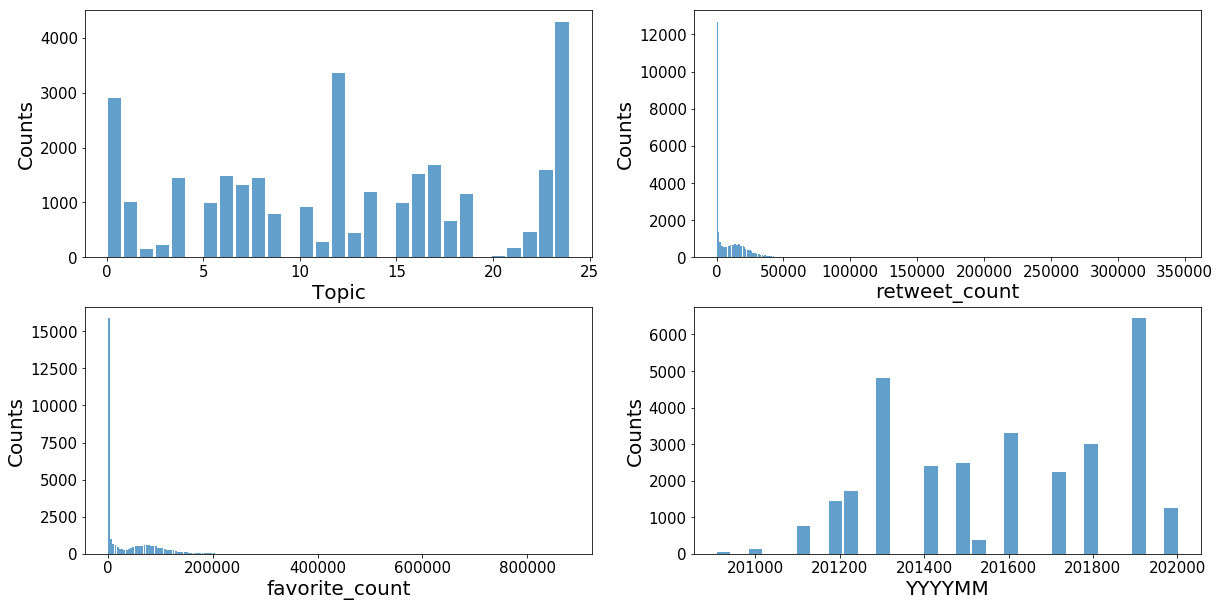

In [16]:
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Topic', 'retweet_count', 'favorite_count','YYYYMM']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins='auto',alpha=0.7, rwidth=0.85) 
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)

##### Step 7: To see if the data is correlated, make some Pearson Ranking charts
The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.

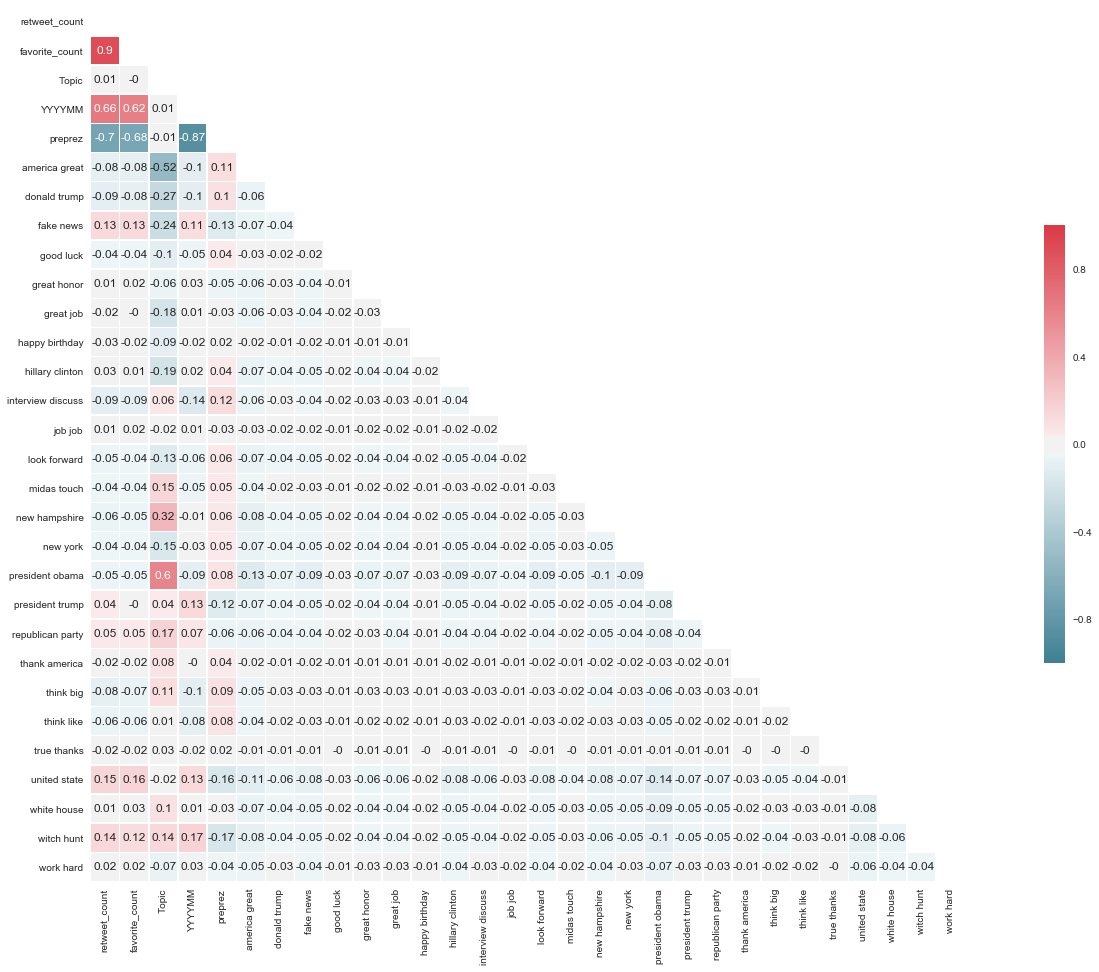

In [21]:
import numpy as np
import seaborn as sns
# apply one hot encoding on the data to pivot the features pn topic
df_one_hot = pd.concat([data,pd.get_dummies(df['topic_top_2'])],axis=1)
df_one_hot = df_one_hot.drop('text', 1)
df_one_hot = df_one_hot.drop('id_str', 1)
df_one_hot = df_one_hot.drop('Date', 1)
df_one_hot = df_one_hot.drop('YYYY', 1)
df_one_hot = df_one_hot.drop('source', 1)

def correlationFunc (df):
    corr = df.corr().round(2)
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(25, 15))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

correlationFunc(df_one_hot)

#### Step 8: Filter the data to show specific distibutions

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


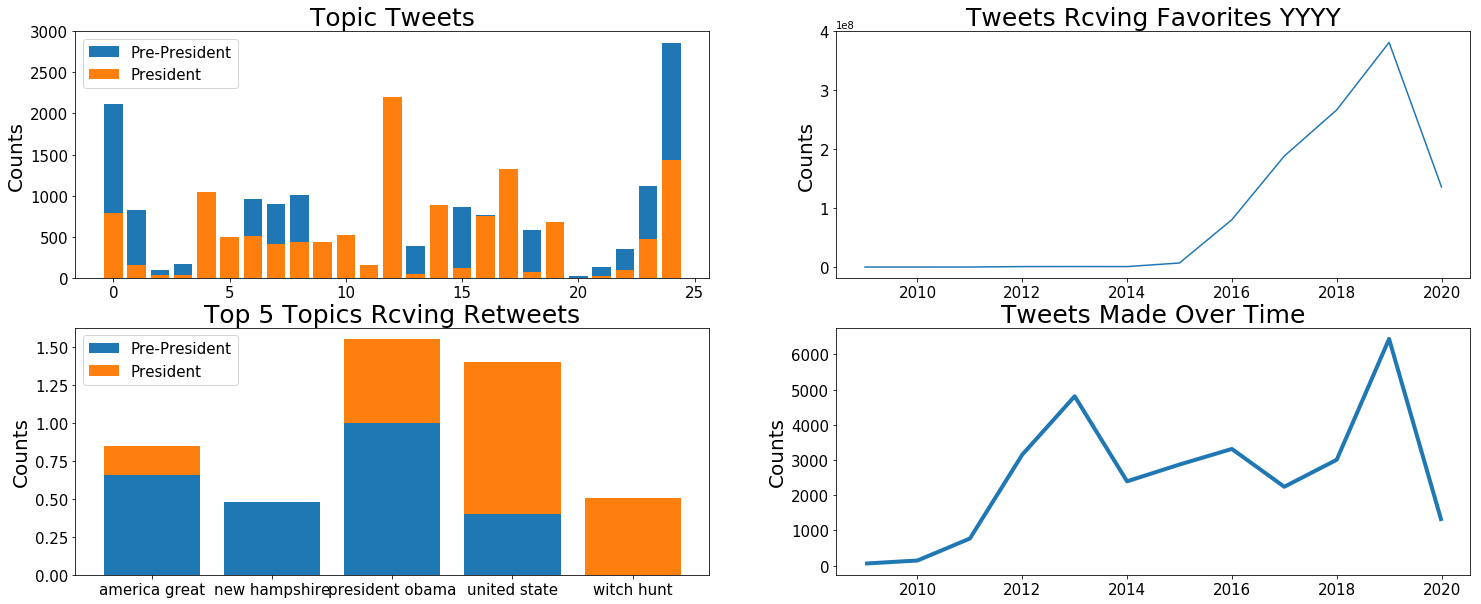

In [18]:
# Dynamically change the default run configure settings or hard code with 20,10 from code example
plt.rcParams['figure.figsize'] = (25, 10)

# subplots utility wrapper makes it convenient to create common layouts of subplots, 
# including the enclosing figure object, in a single call.
# each variable is placed in an axis variable, with a figur variable
fig, axes = plt.subplots(nrows = 2, ncols = 2)

Topics_preprez = data[data['preprez']==1]['Topic'].value_counts()
Topics_postprez = data[data['preprez']==0]['Topic'].value_counts()
# make the bar plot in the first subplot (top left)
p1 = axes[0, 0].bar(Topics_preprez.index, Topics_preprez.values)
p2 = axes[0, 0].bar(Topics_postprez.index, Topics_postprez.values)
axes[0, 0].set_title('Topic Tweets', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Pre-President', 'President'), fontsize = 15)


from sklearn.preprocessing import MinMaxScaler
top_5 = (0,12,17,23,24)

df_pre_top5 = data[(data['preprez']==1) & (data['Topic'].isin(top_5))]
df_post_top5 = data[(data['preprez']==0) & (data['Topic'].isin(top_5))]

df_topic = pd.DataFrame()
df_topic['pre_retweets'] = df_pre_top5.groupby('topic_top_2')['retweet_count'].sum()
df_topic['post_retweets'] = df_post_top5.groupby('topic_top_2')['retweet_count'].sum()

# rescale the data
min_max_scaler = MinMaxScaler()
df_topic[["pre_retweets","post_retweets"]] = min_max_scaler.fit_transform(df_topic[["pre_retweets","post_retweets"]])


###Tweets about Obama Tweets about America Great###
# make the data read to feed into the visualizer  
p3 = axes[1, 0].bar(df_topic["pre_retweets"].index, df_topic[
        "pre_retweets"].values)
p4 = axes[1, 0].bar(df_topic["post_retweets"].index, df_topic[
        "post_retweets"].values, bottom=df_topic["pre_retweets"].values)
axes[1, 0].set_title('Top 5 Topics Rcving Retweets', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p3[0], p4[0]), ('Pre-President', 'President'), fontsize = 15)

df_fav = pd.DataFrame()
df_fav['YYYY'] = data.groupby('YYYY')['favorite_count'].sum()

###Tweets Over Time###
# make the data read to feed into the visualizer  
p4 = axes[0, 1].plot(df_fav["YYYY"].index, df_fav["YYYY"].values)
axes[0, 1].set_title('Tweets Rcving Favorites YYYY', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

df_tweets = pd.DataFrame()
df_tweets['YYYY'] = data.groupby('YYYY')['id_str'].count()

###Tweets about Obama Tweets about America Great###
# make the data read to feed into the visualizer  
plt.style.use('fivethirtyeight')
p4 = axes[1, 1].plot(df_tweets["YYYY"].index, df_tweets["YYYY"].values)
axes[1, 1].set_title('Tweets Made Over Time', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

#### Step 9: Use Parallel Coordinates visualization to compare the distributions of numerical variables between when  that survived and those that did not survive.

['retweet_count', 'favorite_count', 'Topic', 'YYYY']


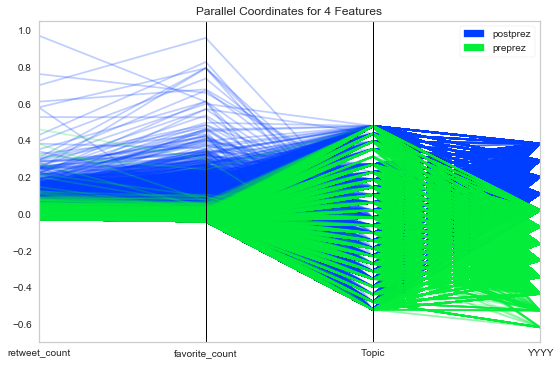

In [20]:
# setup the color for yellowbrick visulizer
# sns_palette is seaborn. 
from yellowbrick.style import set_palette
set_palette('sns_bright')
from yellowbrick.features import ParallelCoordinates
#multi-dimensional feature visualization technique where the vertical axis is duplicated horizontally for each feature
# Specify the features of interest and the classes of the target
df_norm = data.copy()
classes = ['postprez','preprez']
num_features = ['retweet_count', 'favorite_count', 'Topic', 'YYYY']

print(num_features)
# normalize data to 0-1 range using a manual calculation. 
# This could also be done with a variety of libraries, MinMaxScaler()
# without this step, the data graph elements wouldn't be on the same scale.
for feature in num_features:
    df_norm[feature] = (data[feature] - data[feature].mean(skipna=True)
    ) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = df_norm[num_features].values
y = data.preprez.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.poof() # Draw/show/poof the data